In [4]:
from datasets import load_dataset
from sentence_transformers import SentenceTransformer, util

In [5]:
fashion = load_dataset(
    "ashraq/fashion-product-images-small",
    split="train"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/44072 [00:00<?, ? examples/s]

In [6]:
fashion[0:5]

{'id': [15970, 39386, 59263, 21379, 53759],
 'gender': ['Men', 'Men', 'Women', 'Men', 'Men'],
 'masterCategory': ['Apparel', 'Apparel', 'Accessories', 'Apparel', 'Apparel'],
 'subCategory': ['Topwear', 'Bottomwear', 'Watches', 'Bottomwear', 'Topwear'],
 'articleType': ['Shirts', 'Jeans', 'Watches', 'Track Pants', 'Tshirts'],
 'baseColour': ['Navy Blue', 'Blue', 'Silver', 'Black', 'Grey'],
 'season': ['Fall', 'Summer', 'Winter', 'Fall', 'Summer'],
 'year': [2011.0, 2012.0, 2016.0, 2011.0, 2012.0],
 'usage': ['Casual', 'Casual', 'Casual', 'Casual', 'Casual'],
 'productDisplayName': ['Turtle Check Men Navy Blue Shirt',
  'Peter England Men Party Blue Jeans',
  'Titan Women Silver Watch',
  'Manchester United Men Solid Black Track Pants',
  'Puma Men Grey T-shirt'],
 'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=L size=60x80>,
  <PIL.JpegImagePlugin.Jp

In [7]:
fashion.features

{'id': Value(dtype='int64', id=None),
 'gender': Value(dtype='string', id=None),
 'masterCategory': Value(dtype='string', id=None),
 'subCategory': Value(dtype='string', id=None),
 'articleType': Value(dtype='string', id=None),
 'baseColour': Value(dtype='string', id=None),
 'season': Value(dtype='string', id=None),
 'year': Value(dtype='float64', id=None),
 'usage': Value(dtype='string', id=None),
 'productDisplayName': Value(dtype='string', id=None),
 'image': Image(decode=True, id=None)}

In [8]:
images = fashion["image"]
fashion=fashion.remove_columns("image")

fashion_frame=fashion.to_pandas()

In [10]:
fashion_frame

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44067,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44068,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44069,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44070,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [11]:
model = SentenceTransformer('clip-ViT-B-32')

modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.91k [00:00<?, ?B/s]

0_CLIPModel/vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

0_CLIPModel/config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

0_CLIPModel/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

0_CLIPModel/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

0_CLIPModel/tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

0_CLIPModel/preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [12]:
product_number=0

text_embedding = model.encode([fashion_frame['productDisplayName'][product_number]])
image_embedding=model.encode(images[product_number])

query="blue jeans"
query_embedding = model.encode(query)

In [13]:
cosine = util.cos_sim(image_embedding, query_embedding)

In [14]:
cosine

tensor([[0.2068]])

In [15]:
image_embeddings = model.encode([image for image in images])

In [16]:
results = util.semantic_search(query_embedding, image_embeddings, top_k=10)[0]

In [17]:
results

[{'corpus_id': 36711, 'score': 0.28698891401290894},
 {'corpus_id': 26372, 'score': 0.28497713804244995},
 {'corpus_id': 10125, 'score': 0.28484582901000977},
 {'corpus_id': 11907, 'score': 0.28346073627471924},
 {'corpus_id': 1, 'score': 0.2814236283302307},
 {'corpus_id': 42971, 'score': 0.28113454580307007},
 {'corpus_id': 27889, 'score': 0.28097790479660034},
 {'corpus_id': 13421, 'score': 0.28049910068511963},
 {'corpus_id': 43235, 'score': 0.28045544028282166},
 {'corpus_id': 17844, 'score': 0.27989107370376587}]

In [18]:
def img_search(query, k=10):
    query_embedding = model.encode([query])
    results = util.semantic_search(query_embedding, image_embeddings, top_k=k)[0]
    for r in results:
        display(images[r['corpus_id']])

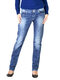

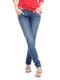

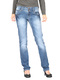

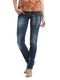

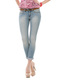

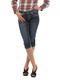

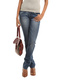

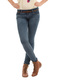

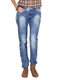

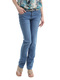

In [21]:
img_search('woman, blue jean')

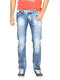

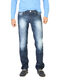

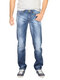

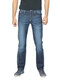

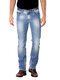

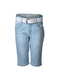

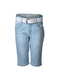

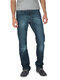

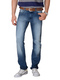

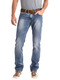

In [24]:
img_search('men, blue jean')